### Pytorch Geometric 기초

In [4]:
import torch

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
     |████████████████████████████████| 7.9 MB 10.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
     |████████████████████████████████| 3.5 MB 7.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
     |████████████████████████████████| 2.4 MB 7.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
     |████████████████████████████████| 709 kB 8.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/

In [5]:
import torch
from torch_geometric.data import Data

In [8]:
edge_index=torch.tensor([[0,1,1,2],
                         [1,0,2,1]],dtype=torch.long) ## 엣지는 2개 + undirected
x=torch.tensor([[-1],[0],[1]],dtype=torch.float) ## 노드는 3개

In [14]:
data=Data(x=x,edge_index=edge_index)

In [15]:
data

Data(x=[3, 1], edge_index=[2, 4])

In [24]:
data.contains_isolated_nodes

<bound method BaseData.contains_isolated_nodes of Data(x=[3, 1], edge_index=[2, 4])>

In [16]:
## edge_index를 transpose해서 똑같은 graph를 만들 수 있다.

edge_index=torch.tensor([[0,1],
                         [1,0],
                         [1,2],
                         [2,1]],dtype=torch.long) ## 엣지는 2개 + undirected
x=torch.tensor([[-1],[0],[1]],dtype=torch.float) ## 노드는 3개

In [17]:
data2=Data(x=x,edge_index=edge_index.t().contiguous())

In [18]:
data2

Data(x=[3, 1], edge_index=[2, 4])

In [19]:
data2.num_nodes # 노드 개수

3

In [20]:
data2.num_edges # 엣지 개수

4

In [21]:
data2.contains_isolated_nodes() # 고립 노드 여부 확인

/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'contains_isolated_nodes' is deprecated, use 'has_isolated_nodes' instead
  warnings.warn(out)


False

In [22]:
data2.contains_self_loops() # 셀프 루프 포함 여부

/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'contains_self_loops' is deprecated, use 'has_self_loops' instead
  warnings.warn(out)


False

In [23]:
data2.is_directed() # 그래프의 방향성 존재 여부

False

### Pytorch 예제

#### ENZYMES 데이터셋

In [25]:
## ENZYMES 예제
from torch_geometric.datasets import TUDataset

dataset=TUDataset(root='/tmp/ENZYMES',name='ENZYMES')

Extracting /tmp/ENZYMES/ENZYMES/ENZYMES.zip
Processing...
Done!


In [26]:
len(dataset)

600

In [27]:
dataset.num_classes # 그래프의 클래스 수 -> 6종류의 클래스를 가진 600개의 그래프 존재

6

In [28]:
dataset.num_node_features # 노드의 특징 수

3

데이터셋은 6종류의 클래스를 가진 600개의 그래프가 존재
- 인덱스 슬라이싱을 통해 일부만 가져오기 가능

In [29]:
dataset[1]
## edge_index -> 엣지는 총 84개 // x -> 총 37개의 노드와 3개의 특성 // y -> 그래프 레벨 타깃

Data(edge_index=[2, 102], x=[23, 3], y=[1])

In [30]:
dataset[0]

Data(edge_index=[2, 168], x=[37, 3], y=[1])

In [31]:
dataset[3]

Data(edge_index=[2, 90], x=[24, 3], y=[1])

In [33]:
dataset[599]

Data(edge_index=[2, 156], x=[48, 3], y=[1])

In [34]:
data.is_undirected() # 방향성 없음

True

In [35]:
train_dataset=dataset[:540]
test_dataset=dataset[540:]

In [36]:
dataset=dataset.shuffle() ## shuffle

#### Cora 데이터셋

In [37]:
from torch_geometric.datasets import Planetoid

dataset=Planetoid(root='/tmp/Cora',name='Cora')

Processing...
Done!


In [38]:
len(dataset) ## length가 1이라는 의미 == 데이터셋 전체가 하나의 그래프

1

In [39]:
dataset.num_classes ## 클래스수 (그래프가 아니라 노드임...이 뭔 소리지)

7

In [40]:
dataset.num_node_features ## 1433개의 노드 특성

1433

In [41]:
data=dataset[0]

In [42]:
data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [43]:
data.is_undirected()

True

In [44]:
data.train_mask.sum().item() ## train_mask : 학습하기 위해 사용하는 노드

140

In [45]:
data.val_mask.sum().item() ## val_mask : 검증 시 사용하는 노드

500

In [46]:
data.test_mask.sum().item() ## test_mask : 테스트 시 사용하는 노드

1000

### 미니배치

- Pytorch geometric은 **sparse block diagonal adjacency matrices**을 이용해 미니배치 형태로 만들고, 이를 병렬화 처리함

- 이때 feature 행렬과 target 행렬도 노드 기준 동일한 형태로 구성

- 구획화된 행렬 (Ai,Xi,Yi)가 하나의 배치가 되어 동작함
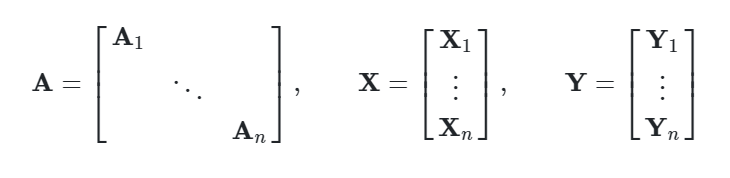

In [49]:
from torch_geometric.datasets import TUDataset
from torch_geometric.data import DataLoader

dataset=TUDataset(root='tmp/ENZYMES',name='ENZYMES',use_node_attr=True)
loader=DataLoader(dataset,batch_size=32) ## 1082개의 노드들에 대해 32개의 batch 부여

for batch in loader:
  print(batch)
  print(batch.num_graphs)
  print("============================================")

/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


DataBatch(edge_index=[2, 4264], x=[1069, 21], y=[32], batch=[1069], ptr=[33])
32
DataBatch(edge_index=[2, 3444], x=[972, 21], y=[32], batch=[972], ptr=[33])
32
DataBatch(edge_index=[2, 3848], x=[976, 21], y=[32], batch=[976], ptr=[33])
32
DataBatch(edge_index=[2, 4026], x=[1099, 21], y=[32], batch=[1099], ptr=[33])
32
DataBatch(edge_index=[2, 2560], x=[669, 21], y=[32], batch=[669], ptr=[33])
32
DataBatch(edge_index=[2, 4428], x=[1105, 21], y=[32], batch=[1105], ptr=[33])
32
DataBatch(edge_index=[2, 4434], x=[1145, 21], y=[32], batch=[1145], ptr=[33])
32
DataBatch(edge_index=[2, 3614], x=[911, 21], y=[32], batch=[911], ptr=[33])
32
DataBatch(edge_index=[2, 4144], x=[1096, 21], y=[32], batch=[1096], ptr=[33])
32
DataBatch(edge_index=[2, 5558], x=[1654, 21], y=[32], batch=[1654], ptr=[33])
32
DataBatch(edge_index=[2, 3538], x=[927, 21], y=[32], batch=[927], ptr=[33])
32
DataBatch(edge_index=[2, 3192], x=[845, 21], y=[32], batch=[845], ptr=[33])
32
DataBatch(edge_index=[2, 3582], x=[926, 

### 데이터 변환

- ShapeNet 데이터 : 17000건의 3D 형태의 점 구름 데이터 (총 16개의 카테고리)

In [50]:
from torch_geometric.datasets import ShapeNet

dataset=ShapeNet(root='/tmp/ShapeNet',categories=['Airplane'])
dataset[0]
## edge_index가 없다 == 연결관계 없음
## pos=[2518,3]의 의미 : 2518개의 점 데이터와 3차원임

Extracting tmp/ShapeNet/shapenetcore_partanno_segmentation_benchmark_v0_normal.zip
Processing...
Done!


Data(x=[2518, 3], y=[2518], pos=[2518, 3], category=[1])

In [54]:
## transform
import torch_geometric.transforms as T
from torch_geometric.datasets import ShapeNet

dataset=ShapeNet(root='/tmp/ShapeNet',categories=['Airplane'],
                 pre_transform=T.KNNGraph(k=6), ## KNN을 통해 데이터를 그래프 형태로 변환 (엣지 생긴것 확인 가능)
                 transform=T.RandomTranslate(0.01)) ## 각 노드들의 위치를 아주 조금 이동 (perturbation 작업 일종)
dataset[0]

Extracting /tmp/ShapeNet/shapenetcore_partanno_segmentation_benchmark_v0_normal.zip
Processing...
Done!


Data(x=[2518, 3], y=[2518], pos=[2518, 3], category=[1], edge_index=[2, 15108])

### 그래프로 학습하기

- 간단한 GCN layer을 구성한 뒤 Cora 데이터셋에 적용
  - Cora : 2708개의 scientific publication으로 구성된 데이터
  - citation network : 각 논문은 노드, 인용관계는 edge

- Graph Node Classification
  - 임의의 논문에 대해 논문 내 등장한 단어들과 인용 관계만으로 어떤 종류의 논문인지 맞히는 task

In [55]:
## 데이터셋 불러오기
from torch_geometric.datasets import Planetoid

dataset=Planetoid(root='/tmp/Cora',name='Cora')

In [56]:
## GNN 생성 - 2개의 GCNConv layer 형성
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class Net(torch.nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1=GCNConv(dataset.num_node_features,16)
    self.conv2=GCNConv(16,dataset.num_classes)
  
  def forward(self,data):
    x,edge_index=data.x,data.edge_index

    x=self.conv1(x,edge_index)
    x=F.relu(x)
    x=F.dropout(x,training=self.training)
    x=self.conv2(x,edge_index)

    return F.log_softmax(x,dim=1)

In [58]:
## 이미 정의된 train_mask 이용해 학습 데이터 구분
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=Net().to(device)
data=dataset[0].to(device)
optimizer=torch.optim.Adam(model.parameters(),lr=0.01,weight_decay=5e-4)

model.train()

for epoch in range(200):
  optimizer.zero_grad()
  out=model(data)
  loss=F.nll_loss(out[data.train_mask],data.y[data.train_mask])
  loss.backward()
  optimizer.step()

In [60]:
model.eval()
_,pred=model(data).max(dim=1)
correct=float(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
acc=correct/data.test_mask.sum().item()
print('Accuracy: {:4f}'.format(acc))

Accuracy: 0.803000
